# About Kiva

Kiva.org is a non-profit online platform for crowdfunding that allows individuals to borrow funds for business purposes. Its mission is to improve the welfare of marginalized citizens (especially low-income entrepreneurs and students) in several countries. Crowdfunding is the activity of raising capital from several individuals to finance a new business venture.

Step involved : 
1. Importing Libraries
2. Data Preparation
3. Data Wrangling and Reshaping

   3.1 Data Aggregation
   
   3.2 Handling Missing Value
   
   3.3 Reshaping
   
   
4. Visualization

# 1. Importing Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Data Preparation

First, load file `loan_kiva.csv` on folder `data_input`

In [23]:
kiva = pd.read_csv('data_input/loan_kiva.csv')
kiva.head()

,id,funded_amount,loan_amount,activity,sector,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,PKR,247,2014-01-01 06:12:39,2014-01-02 10:06:32,12,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,Pakistan,Lahore,PKR,247,2014-01-01 06:51:08,2014-01-02 09:17:23,11,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,India,Maynaguri,INR,334,2014-01-01 09:58:07,2014-01-01 16:01:36,43,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,Pakistan,Lahore,PKR,247,2014-01-01 08:03:11,2014-01-01 13:00:00,11,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,Pakistan,Abdul Hakeem,PKR,245,2014-01-01 11:53:19,2014-01-01 19:18:51,14,16,monthly


Here is a description of each column:
* `id`: Unique ID for each loan (loan ID)
* `funded_amount`: Amount disbursed by Kiva to agents (USD)
* `loan_amount`: The amount disbursed by the agent to the borrower (USD)
* `activity`: More specific Category than `sector`
* `sector`: Category of the loan
* `country`: Full country name, where the loan was disbursed
* `region`: Full region name of `country`
* `currency`: Currency
* `partner_id`: ID for the partner organization
* `posted_time`: Loan time posted on Kiva by agent
* `funded_time`: The time the loan has been fully funded by the lender
* `term_in_months`: Duration of loan disbursement (in months)
* `lender_count`: The number of contributing borrowers
* `repayment_interval`: How the loan is repaid

In [24]:
kiva.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
country                object
region                 object
currency               object
partner_id              int64
posted_time            object
funded_time            object
term_in_months          int64
lender_count            int64
repayment_interval     object
dtype: object

Change data type:
- objects: `id`, `partner_id`
- category: `activity`, `sector`, `country`, `region`, `currency`, `repayment_interval`
- datetime64: `posted_time`, `funded_time`

In [25]:
kiva[['id', 'partner_id']] = kiva[['id', 'partner_id']].astype('object')

kiva[['activity', 'sector', 'country', 'region', 'currency', 'repayment_interval']] = \
kiva[['activity', 'sector', 'country', 'region', 'currency', 'repayment_interval']].astype('category')

kiva[['posted_time', 'funded_time']] = kiva[['posted_time', 'funded_time']].astype('datetime64')

Check the data type again to make sure it has changed:

In [26]:
kiva.dtypes

id                            object
funded_amount                float64
loan_amount                  float64
activity                    category
sector                      category
country                     category
region                      category
currency                    category
partner_id                    object
posted_time           datetime64[ns]
funded_time           datetime64[ns]
term_in_months                 int64
lender_count                   int64
repayment_interval          category
dtype: object

See what countries are in kiva data:

In [27]:
kiva.country.cat.categories

Index(['Afghanistan', 'Albania', 'Armenia', 'Azerbaijan', 'Belize', 'Benin',
       'Bolivia', 'Brazil', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Georgia',
       'Ghana', 'Guatemala', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iraq',
       'Israel', 'Jordan', 'Kenya', 'Kosovo', 'Kyrgyzstan',
       'Lao People's Democratic Republic', 'Lebanon', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mexico', 'Moldova',
       'Mongolia', 'Mozambique', 'Myanmar (Burma)', 'Namibia', 'Nepal',
       'Nicaragua', 'Nigeria', 'Pakistan', 'Palestine', 'Panama', 'Paraguay',
       'Peru', 'Philippines', 'Rwanda', 'Saint Vincent and the Grenadines',
       'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Somalia',
       'South Africa', 'South Sudan', 'Suriname', 'Tajikistan', 'Tanzania',
       'Thailand', 'The Democratic Republic 

# 3. Data Wrangling and Reshaping

In this section we are only interested in analyzing `kiva` data in **Indonesia** only. Do a row filter and save it to the `kiva_indo` object.

In [28]:
kiva_indo = kiva[ kiva['country'] == 'Indonesia']
kiva_indo.head()

,id,funded_amount,loan_amount,activity,sector,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
867,654114,1500.0,1500.0,Phone Use Sales,Retail,Indonesia,Bogor Barat,IDR,219,2014-01-06 10:02:08,2014-01-17 14:08:07,8,51,bullet
954,654140,825.0,825.0,Utilities,Services,Indonesia,Bogor Barat,IDR,219,2014-01-06 10:55:12,2014-01-11 23:24:14,8,26,bullet
1027,654067,1000.0,1000.0,Services,Services,Indonesia,Bogor Barat,IDR,219,2014-01-06 08:46:31,2014-01-15 12:26:59,8,34,bullet
1042,654102,1500.0,1500.0,Services,Services,Indonesia,NaN,IDR,219,2014-01-06 09:42:42,2014-01-06 22:32:09,2,32,bullet
1066,654084,825.0,825.0,Phone Use Sales,Retail,Indonesia,Bogor Barat,IDR,219,2014-01-06 09:13:39,2014-01-08 17:46:44,8,26,bullet


### 3.1 Data Aggregation

Create an aggregation table named `kiva_indo_agg` which displays **average `funded_amount`** for each **`sector` and `activity`**, distinguished by the type of **`repayment_interval`**. Also display the average `funded_amount` information per row and per column.

In [29]:
kiva_indo_agg = pd.crosstab(index=kiva_indo.repayment_interval, 
                            columns=[kiva_indo.sector, kiva_indo.activity], 
                            values=kiva_indo.funded_amount, 
                            aggfunc='mean', 
                            margins=True, 
                            margins_name='mean_funded_amount')
kiva_indo_agg

sector             Agriculture                                                \
activity           Agriculture Animal Sales Cattle Farm Supplies     Farming   
repayment_interval                                                             
bullet                     NaN          NaN    NaN           NaN  562.500000   
irregular               668.75          NaN    NaN         700.0  978.703704   
monthly                    NaN        400.0  875.0           NaN  666.250000   
mean_funded_amount      668.75        400.0  875.0         700.0  869.375000   

sector                                                               Arts  \
activity                Flowers Livestock         Pigs     Poultry   Arts   
repayment_interval                                                          
bullet                      NaN       NaN          NaN         NaN  800.0   
irregular           1462.500000     500.0  1462.162162  550.000000    NaN   
monthly              250.000000     575.0   352.777778  636.111111  400.0   
mean_funded_amount  1058.333333     537.5  1435.817942  620.454545  600.0   

sector              ...    Services                                    \
activity            ...    Services      Sewing Tailoring   Utilities   
repayment_interval  ...                                                 
bullet              ...  755.937500         NaN       NaN  357.142857   
irregular           ...         NaN  925.000000       NaN         NaN   
monthly             ...  286.309524  362.500000     275.0         NaN   
mean_funded_amount  ...  718.151341  603.571429     275.0  357.142857   

sector                                                      Transportation  \
activity           Vehicle Repairs Water Distribution Motorcycle Transport   
repayment_interval                                                           
bullet                         NaN             1825.0                  NaN   
irregular                      NaN                NaN           675.000000   
monthly                      500.0                NaN           350.000000   
mean_funded_amount           500.0             1825.0           396.428571   

sector                                     Wholesale mean_funded_amount  
activity           Transportation Goods Distribution                     
repayment_interval                                                       
bullet                        NaN                NaN         830.894688  
irregular              150.000000              950.0         920.759866  
monthly                629.166667                NaN         675.341297  
mean_funded_amount     560.714286              950.0         854.927650  

[4 rows x 72 columns]

### 3.2 Handling Missing Value

Clean `kiva_indo_agg` and save it to `kiva_indo_agg_clean`:
1. **Handle missing value** (`NaN`) in the data correctly.


Based on the results of `kiva_indo_agg_clean`, answer the following two questions:
- Which `sector` and `activity` have the **biggest `funded_amount` average**?
- Which `sector` and `activity` have the **smallest average `funded_amount`**?

In [30]:
kiva_indo_agg_clean = kiva_indo_agg.fillna(method='bfill').fillna(method='ffill')
kiva_indo_agg_clean

sector             Agriculture                                                \
activity           Agriculture Animal Sales Cattle Farm Supplies     Farming   
repayment_interval                                                             
bullet                  668.75        400.0  875.0         700.0  562.500000   
irregular               668.75        400.0  875.0         700.0  978.703704   
monthly                 668.75        400.0  875.0         700.0  666.250000   
mean_funded_amount      668.75        400.0  875.0         700.0  869.375000   

sector                                                               Arts  \
activity                Flowers Livestock         Pigs     Poultry   Arts   
repayment_interval                                                          
bullet              1462.500000     500.0  1462.162162  550.000000  800.0   
irregular           1462.500000     500.0  1462.162162  550.000000  400.0   
monthly              250.000000     575.0   352.777778  636.111111  400.0   
mean_funded_amount  1058.333333     537.5  1435.817942  620.454545  600.0   

sector              ...    Services                                    \
activity            ...    Services      Sewing Tailoring   Utilities   
repayment_interval  ...                                                 
bullet              ...  755.937500  925.000000     275.0  357.142857   
irregular           ...  286.309524  925.000000     275.0  357.142857   
monthly             ...  286.309524  362.500000     275.0  357.142857   
mean_funded_amount  ...  718.151341  603.571429     275.0  357.142857   

sector                                                      Transportation  \
activity           Vehicle Repairs Water Distribution Motorcycle Transport   
repayment_interval                                                           
bullet                       500.0             1825.0           675.000000   
irregular                    500.0             1825.0           675.000000   
monthly                      500.0             1825.0           350.000000   
mean_funded_amount           500.0             1825.0           396.428571   

sector                                     Wholesale mean_funded_amount  
activity           Transportation Goods Distribution                     
repayment_interval                                                       
bullet                 150.000000              950.0         830.894688  
irregular              150.000000              950.0         920.759866  
monthly                629.166667              950.0         675.341297  
mean_funded_amount     560.714286              950.0         854.927650  

[4 rows x 72 columns]

In [31]:
kiva_indo_agg_clean.transpose()

repayment_interval                            bullet    irregular  \
sector             activity                                         
Agriculture        Agriculture            668.750000   668.750000   
                   Animal Sales           400.000000   400.000000   
                   Cattle                 875.000000   875.000000   
                   Farm Supplies          700.000000   700.000000   
                   Farming                562.500000   978.703704   
...                                              ...          ...   
Services           Water Distribution    1825.000000  1825.000000   
Transportation     Motorcycle Transport   675.000000   675.000000   
                   Transportation         150.000000   150.000000   
Wholesale          Goods Distribution     950.000000   950.000000   
mean_funded_amount                        830.894688   920.759866   

repayment_interval                           monthly  mean_funded_amount  
sector             activity                                               
Agriculture        Agriculture            668.750000          668.750000  
                   Animal Sales           400.000000          400.000000  
                   Cattle                 875.000000          875.000000  
                   Farm Supplies          700.000000          700.000000  
                   Farming                666.250000          869.375000  
...                                              ...                 ...  
Services           Water Distribution    1825.000000         1825.000000  
Transportation     Motorcycle Transport   350.000000          396.428571  
                   Transportation         629.166667          560.714286  
Wholesale          Goods Distribution     950.000000          950.000000  
mean_funded_amount                        675.341297          854.927650  

[72 rows x 4 columns]

In [32]:
# Sector and activity with Highest and Lowest mean_funded_amount
x = kiva_indo_agg_clean.transpose()
x[(x.mean_funded_amount == x.mean_funded_amount.min()) | (x.mean_funded_amount == x.mean_funded_amount.max())]

,repayment_interval,bullet,irregular,monthly,mean_funded_amount
sector,activity,,,,
Arts,Textiles,2850.0,2850.0,2850.0,2850.0
Services,Laundry,250.0,250.0,250.0,250.0


### 3.3 Reshaping

Reshaping** `kiva_indo_agg_clean`

**Notes : Before reshaping, make sure you have removed the `All` column from `kiva_indo_agg_clean`**

Make sure:
- Column `repayment_interval` does not have 'All' value
- The `funded_amount` column is sorted from largest to smallest.

In [33]:
kiva_indo_agg_clean.drop(['mean_funded_amount'], axis=1).transpose().drop(['mean_funded_amount'], axis=1).stack().sort_values(ascending=False)

sector          activity           repayment_interval
Personal Use    Home Energy        monthly               2964.583333
Arts            Textiles           irregular             2850.000000
                                   monthly               2850.000000
                                   bullet                2850.000000
Personal Use    Home Energy        bullet                2641.666667
                                                            ...     
Services        Motorcycle Repair  irregular              150.000000
Transportation  Transportation     bullet                 150.000000
                                   irregular              150.000000
Services        Motorcycle Repair  bullet                 150.000000
Food            Food Market        bullet                 150.000000
Length: 213, dtype: float64

# 4. Visualization

### 4.1 Visualize Top 10 Sectors

Using `kiva_indo` data, visualize the top 10 `sectors` with the most loan applications (by line frequency only).

In [34]:
top_10_sector = kiva_indo.groupby('sector')['loan_amount'].count().sort_values(ascending=False).head(10)
top_10_sector

sector
Retail            667
Services          553
Agriculture       492
Housing           256
Food              195
Personal Use      158
Education         122
Arts               72
Transportation     14
Construction       13
Name: loan_amount, dtype: int64

<AxesSubplot:xlabel='sector'>

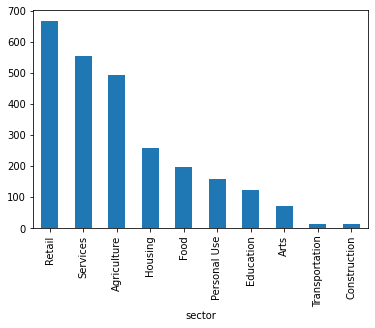

In [35]:
top_10_sector.plot(kind='bar')

**Insight:** The sector with the most loan applications is... **Retail**

### 4.2 Visualize the Distribution of the Average Funded Amount

Using `kiva_indo_agg`, visualize the distribution of the average `funded_amount` for each `repayment_interval` only in the **sector with the highest number of loan applications (from the previous number)**.

In [36]:
top_10 = ['Retail', 'Services', 'Agriculture', 'Housing', 'Food', 'Personal Use', 'Education', 'Arts', 'Transportation', 'Construction']
kiva_indo_agg[top_10]

sector                     Retail                                   \
activity           Charcoal Sales Cosmetics Sales Electrical Goods   
repayment_interval                                                   
bullet                        NaN             NaN              NaN   
irregular                     NaN           725.0           1162.5   
monthly                     600.0             NaN              NaN   
mean_funded_amount          600.0           725.0           1162.5   

sector                                                              \
activity           Fuel/Firewood General Store Home Products Sales   
repayment_interval                                                   
bullet                       NaN    855.000000         1167.253521   
irregular             365.000000    602.192982                 NaN   
monthly               325.000000    421.323529         2031.250000   
mean_funded_amount    358.333333    551.302083         1213.333333   

sector                                                              \
activity           Mobile Phones Phone Accessories Phone Use Sales   
repayment_interval                                                   
bullet                588.888889             815.0      695.533333   
irregular                    NaN               NaN      431.250000   
monthly                      NaN               NaN             NaN   
mean_funded_amount    588.888889             815.0      692.744063   

sector                                 ...         Arts                       \
activity           Recycled Materials  ...       Crafts Textiles     Weaving   
repayment_interval                     ...                                     
bullet                            NaN  ...  2192.708333   2850.0         NaN   
irregular                       750.0  ...   775.000000      NaN  341.176471   
monthly                           NaN  ...   400.000000      NaN  612.500000   
mean_funded_amount              750.0  ...  2128.500000   2850.0  369.736842   

sector                   Transportation                Construction            \
activity           Motorcycle Transport Transportation       Bricks Carpentry   
repayment_interval                                                              
bullet                              NaN            NaN          NaN       NaN   
irregular                    675.000000     150.000000          NaN       NaN   
monthly                      350.000000     629.166667        525.0     400.0   
mean_funded_amount           396.428571     560.714286        525.0     400.0   

sector                                                              
activity           Construction Construction Supplies Timber Sales  
repayment_interval                                                  
bullet                      NaN                   NaN          NaN  
irregular                   NaN                 562.5          NaN  
monthly              616.666667                 400.0        900.0  
mean_funded_amount   616.666667                 530.0        900.0  

[4 rows x 65 columns]

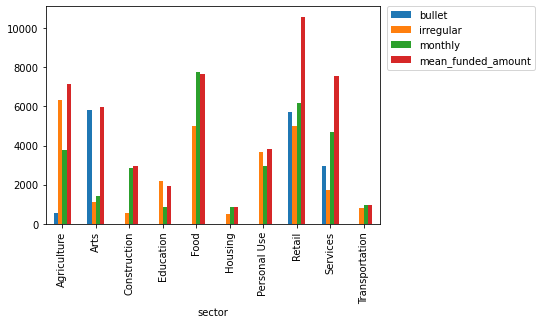

In [37]:
kiva_indo_agg[top_10].transpose().groupby('sector').sum().plot(kind='bar')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

**Insight:**
- Secara keseluruhan, `repayment_interval` dengan rata-rata `funded_amount` yang tertinggi adalah ... **Retail**
- `repayment_interval` dengan rata-rata `funded_amount` yang paling beragam adalah ... **Agriculture**
- `repayment_interval` tanpa data pencilan adalah ... **Housing dan Transportation**